In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd

### We have to build a binary classifier which will predict  whether the review is 1 star or 5 star according to the text in the review.Firstly we will read the yelp data as a pandas dataframe

In [2]:
yelp=pd.read_csv("yelp.csv")

### Let us get the info,description and head of this data frame 

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
text_length    10000 non-null int64
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


### There are no missing values in this data frame

In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Let us see the variation of length of the 1 star and 5 star reviews.For this we will add a length column to the dataframe

In [6]:
yelp['text_length']=yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


### Now we will visualize the variation of text length of review according to stars given to the review 

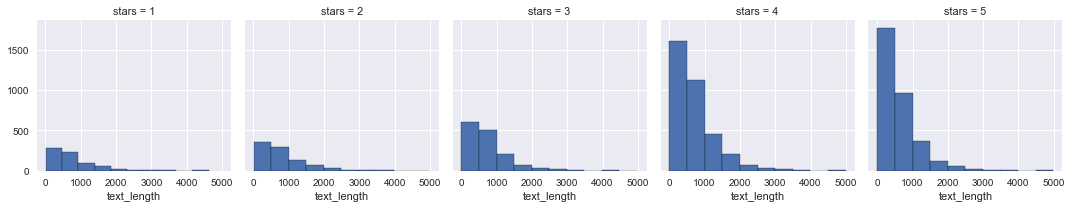

In [19]:
plt.figure(figsize=(12,12))
Grid=sns.FacetGrid(yelp,col='stars')
Grid.map(plt.hist,'text_length',edgecolor='black')

### You can see that text length for majority of data associated with these plots is between 0 and 1000.However you can see there are a numbers of outliers in all these plots.As the no os stars increase the value of these outliers increase.For eg for 1 star review outlier are between roughly 4000-4500 wherease for 5 stars review it is 5000

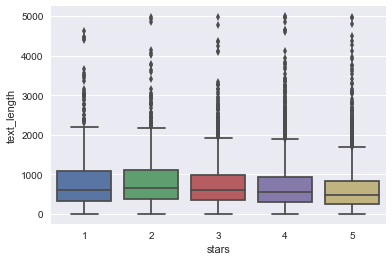

In [20]:
sns.boxplot(data=yelp,x='stars',y='text_length')

### As the no stars increase the median of text length decreases,however number of outliers increase

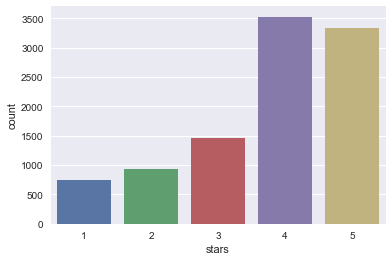

In [21]:
sns.countplot(data=yelp,x='stars')

### The count of 4 stars reviews is maximum

#### If we groupby the data frame according to the stars column which is a categorical column and take mean of all the other columns we get

In [22]:
yelp_gr=yelp.groupby('stars').mean()
yelp_gr

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


### From here we can see that the average text length decreases as the number of stars increases

### Now let us do all the training and predictions and build a machine learning model

#### First we will create another data frame using the previous dataframe which will contain only 1 star and 5 star reviews as we have to classify either 1 star or 5 star

In [23]:
yelp_class=yelp[(yelp['stars']==5)|(yelp['stars']==1)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [24]:
X=yelp_class['text']
Y=yelp_class['stars']

### Now we will create count vectorizer object.It will basically count the frequency of each word in every text review and create a sparse matrix

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
X=CountVectorizer().fit_transform(X)

### Now we will split data into training set and test seta and train the data using a Naive Bayes Classifier

In [28]:
from sklearn.cross_validation import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb=MultinomialNB()
nb.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Let us predict 

In [32]:
predict=nb.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [34]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[203  25]
 [ 12 986]]
             precision    recall  f1-score   support

          1       0.94      0.89      0.92       228
          5       0.98      0.99      0.98       998

avg / total       0.97      0.97      0.97      1226



In [36]:
print(accuracy_score(y_test,predict))

0.969820554649


### You can see the accuracy is great 96.98% close to 97%